**Parkinsons Disease Data Set**

***Dataset information:***
This dataset is composed of a range of biomedical voice measurements of people with Parkinson's disease (PD) and of healthy people. Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.

***Attribute Information:***
- Matrix column entries (attributes):

- **name**- ASCII subject name and recording number
- **MDVP:Fo(Hz)** - Average vocal fundamental frequency
- **MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency
- **MDVP:Flo(Hz)** - Minimum vocal fundamental frequency 
- **MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP** - Several measures of variation in fundamental frequency
- **MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA** - Several measures of variation in amplitude
- **NHR,HNR** - Two measures of ratio of noise to tonal components in the voice
- **status** - Health status of the subject (one) - Parkinson's, (zero) - healthy
- **RPDE,D2** - Two nonlinear dynamical complexity measures
- **DFA** - Signal fractal scaling exponent 
- **spread1,spread2,PPE** - Three nonlinear measures of fundamental frequency variation

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')           # Ignore warnings

import pandas as pd                         # For converting .csv file into Dataframe
import numpy as np                          # For Numeric operations
import seaborn as sns                       # For Data Visualization
import matplotlib.pyplot as plt             # For plotting Data

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

## 1. Load the dataset

In [2]:
# Creatinf df dataframe and importing data from 'parkinsons.data' file
df = pd.read_csv('parkinsons.data') 

## 2. Analysis of Raw data in Dataset

In [3]:
df.shape 

(195, 24)

#### There are 195 rows and 24 columns/features in the dataset

### Checking the head and tail of the dataset

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [6]:
df.describe().transpose()
# This gives the measure of each attribute telling its mean, standard deviation, different quartile values and min & max 

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [7]:
# Checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
# Checking null value 
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

#### The dataset doesnt consist of any null values 

In [9]:
#Checking the datatypes of each attributes
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

#### All the featues of the dataset are of float types and target column status is of the type int

In [10]:
# 'Status' is the target column, checking the counts
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

#### As we can see the dataset consists of 147 datapoints which represent the positive cases of parkinson disease 
#### and only 48 datapoints for negative cases.
#### Thus we can conclude that the dataset is bias towards the positive cases of parkinson disease.

## 3.Univariate & Bi-Variate Analysis of each attribute

### Univariate Analysis

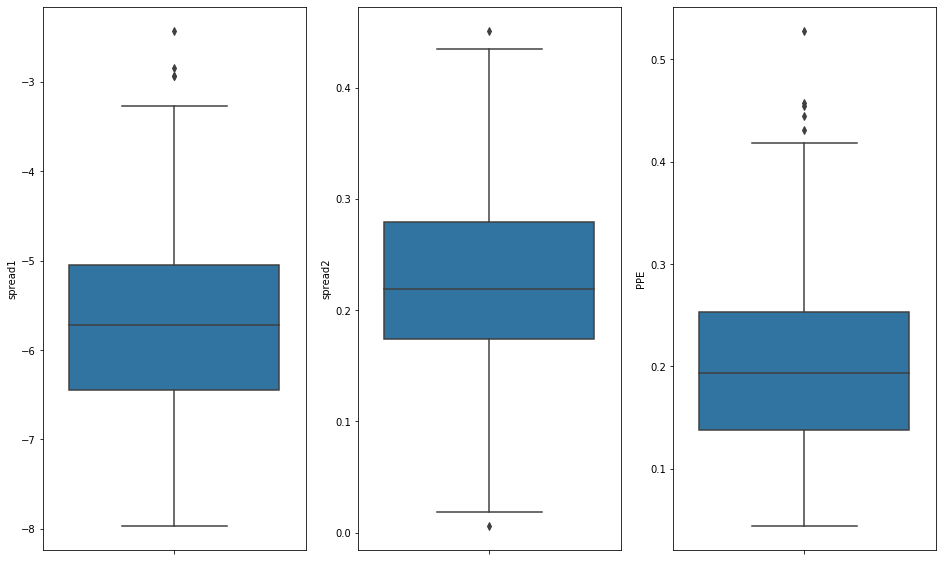

In [11]:
fig, ax = plt.subplots(1,3,figsize=(16,10)) 
sns.boxplot(x='spread1',data=df, ax=ax[0],orient='v') 
sns.boxplot(x='spread2',data=df, ax=ax[1],orient='v')
sns.boxplot(x='PPE',data=df,ax=ax[2],orient='v')

The above figure shows the box plot of the frequency variation. All the three variations have outliers.
Generally speaking, decision trees are able to handle outliers. It is very unlikely that decision tree will create a leaf to isolate them

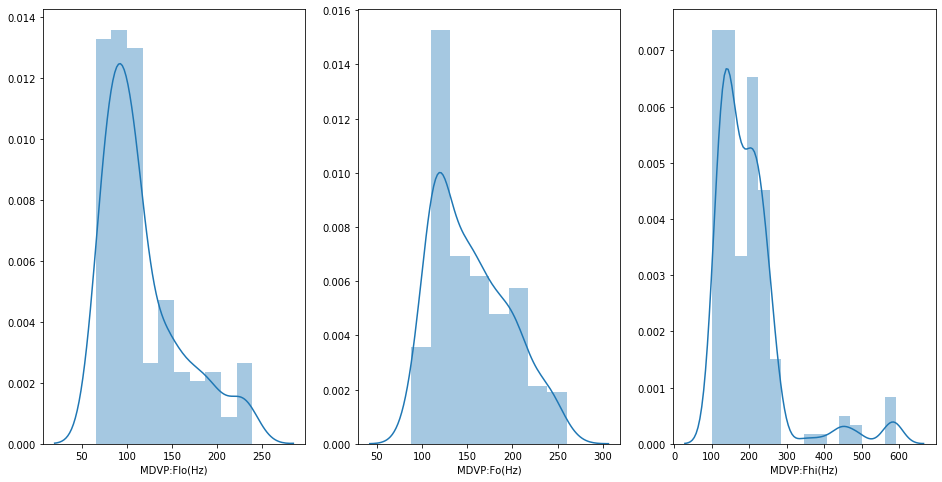

In [12]:
fig, ax = plt.subplots(1,3,figsize=(16,8)) 
sns.distplot(df['MDVP:Flo(Hz)'],ax=ax[0]) 
sns.distplot(df['MDVP:Fo(Hz)'],ax=ax[1]) 
sns.distplot(df['MDVP:Fhi(Hz)'],ax=ax[2])

The measures of vocal fundamental frequency are shown above. There is a positive skewness for minimum vocal fundemental frequency with more high values between 75Hz and 125Hhz. The average vocal frequency is almost normally distributed with more values ranging 115Hz and 130Hz. The high vocal frequency does not have any skewness, but some range of values are at the right most tail

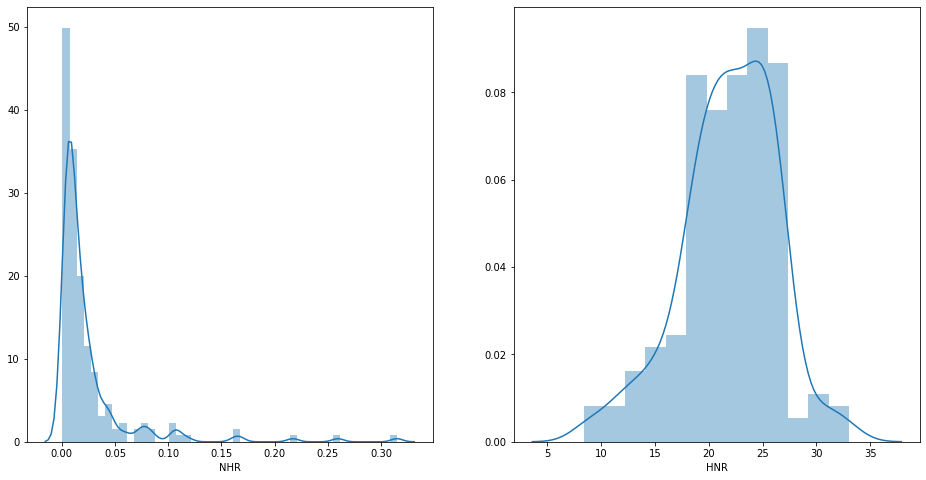

In [13]:
fig, ax = plt.subplots(1,2,figsize=(16,8)) 
sns.distplot(df['NHR'],ax=ax[0]) 
sns.distplot(df['HNR'],ax=ax[1])

The measure of tonal component of frequency is shown above. The value NHR is right skewed for there are so many observations in the area, but they seem to be with very minimal values. The maximum number of observations is between 0 and 0.04.
The value HNR looks like normally distributed, but in a first look there seems to be a slight negative skewness

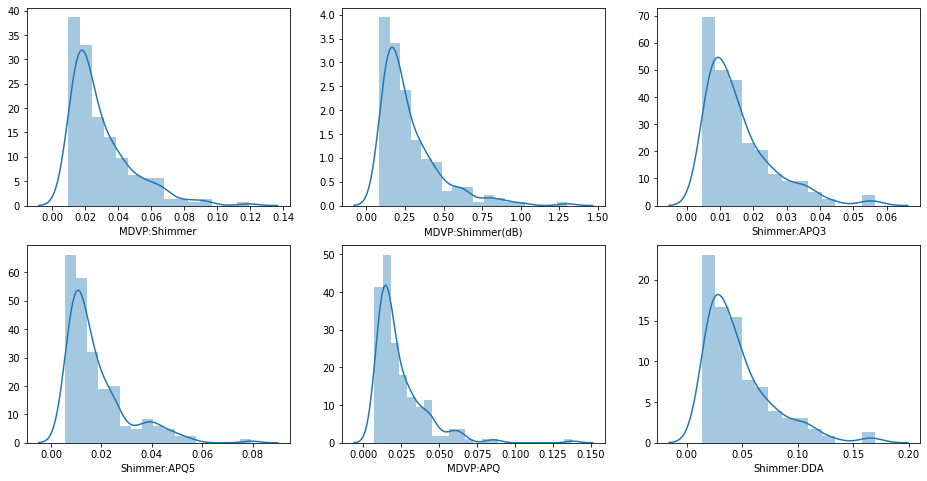

In [14]:
fig, ax = plt.subplots(2,3,figsize=(16,8)) 
sns.distplot(df['MDVP:Shimmer'],ax=ax[0,0]) 
sns.distplot(df['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sns.distplot(df['Shimmer:APQ3'],ax=ax[0,2]) 
sns.distplot(df['Shimmer:APQ5'],ax=ax[1,0]) 
sns.distplot(df['MDVP:APQ'],ax=ax[1,1]) 
sns.distplot(df['Shimmer:DDA'],ax=ax[1,2])

For all of the above graphs, we can observe that the measure of variation in amplitude is positively skewed

### Bi -Variate Analysis

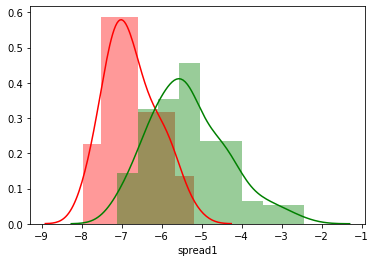

In [15]:
sns.distplot( df[df.status == 0]['spread1'], color = 'r')
sns.distplot( df[df.status == 1]['spread1'], color = 'g')

Spread1 is normally distributed between person who have PD and who is normal. People who have spread1 between - 8.5 and -7.5 are more and they are normal. People whose spread1 is between -6.5 and -5 are having PD

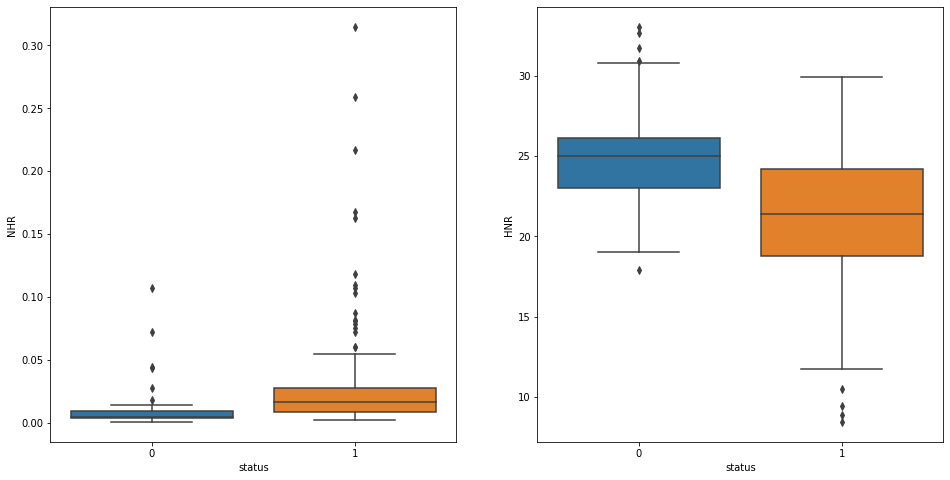

In [16]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y='NHR',data=df,ax=ax[0])
sns.boxplot(x='status',y='HNR',data=df,ax=ax[1])

People who have PD(status equal to one) have higher levels of Noise to Harmonic ratio. Also, looking into the HNR ratio people who have PD have lower levels in the same.

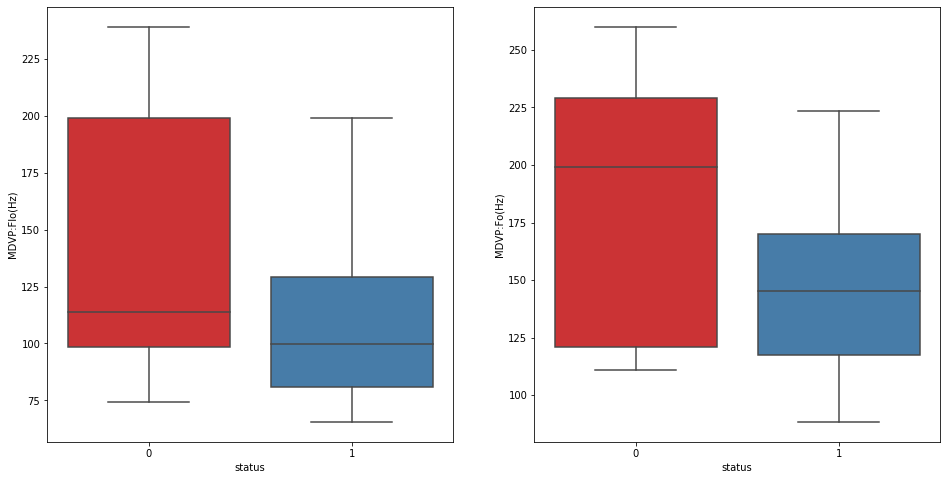

In [17]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y='MDVP:Flo(Hz)',data=df,palette="Set1",ax=ax[0])
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=df,palette="Set1",ax=ax[1])

When we look the relationship between status and MDVP:Fo(Hz) we can see the median value is around 199 Hz for people who are normal. For people who are affected with Parkinsons the median value comes around 145 Hz

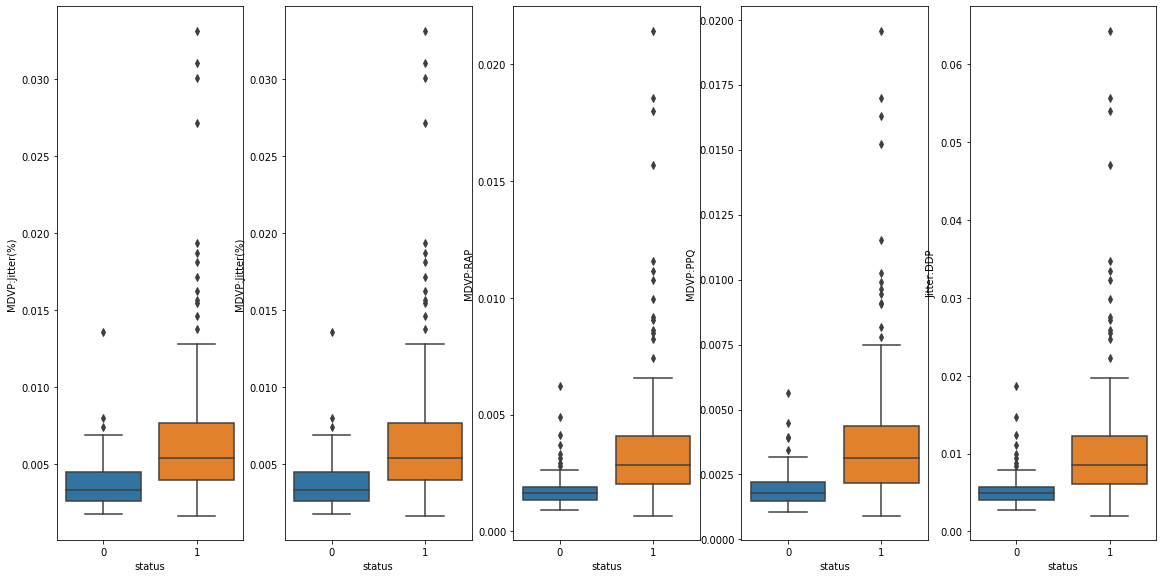

In [18]:
# For categorical predictors
cols = ["MDVP:Jitter(%)","MDVP:Jitter(%)","MDVP:RAP","MDVP:PPQ","Jitter:DDP"]
fig, axs = plt.subplots(ncols = 5,figsize=(16,8))
fig.tight_layout()
for i in range(0,len(cols)):
    sns.boxplot(x='status',y=cols[i],data=df, ax = axs[i])

People who are suffering for PD tend to have higher jitter %. It seems if the values goes above 0.15 we can confirm the patient is having PD. The variation of fundamental frequency is in a low range for people who is normal.

## Correlation comparision with heat map

Histogram plot visualisation for each attribute will be so diffcult because we have high dimensional column 23.

So Better, we can use heat map to find the correlations coefficient values. we will remove the less correlation coefficient columns. We can remove the irrelavant features it will minimize the accuracy of an algorithm.

It will be better if we take relavent features columns then we can achive to get good accuracy..

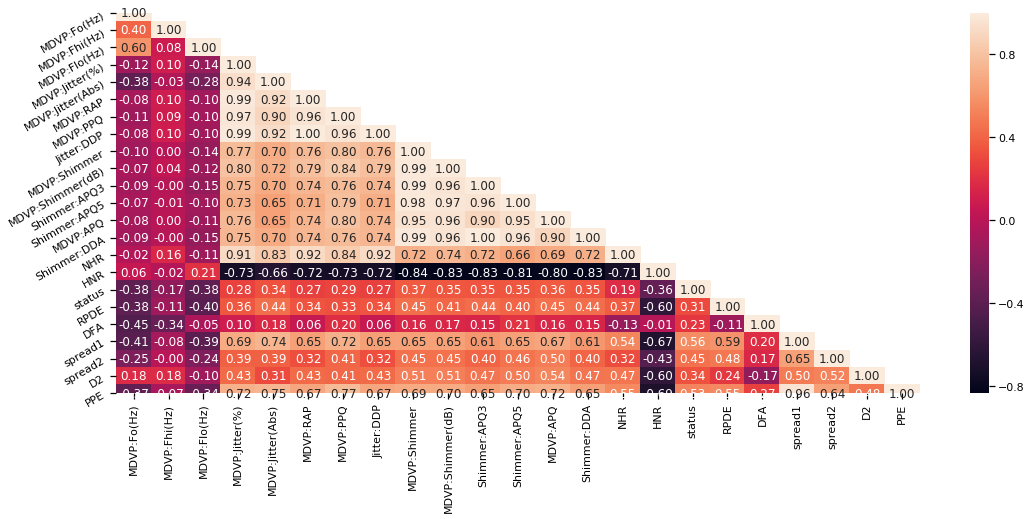

In [19]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(18,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

* MDVP:Jitter(%) has a very high correlation with MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP
* MDVP:Shimmer has a very correlation with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA this may be because they are related to each other. This may be because multi-dimensinal voice programs analysis is closely related with these variables
* The target variable status has a weak positive corelation with spread1

#### Pairplot:


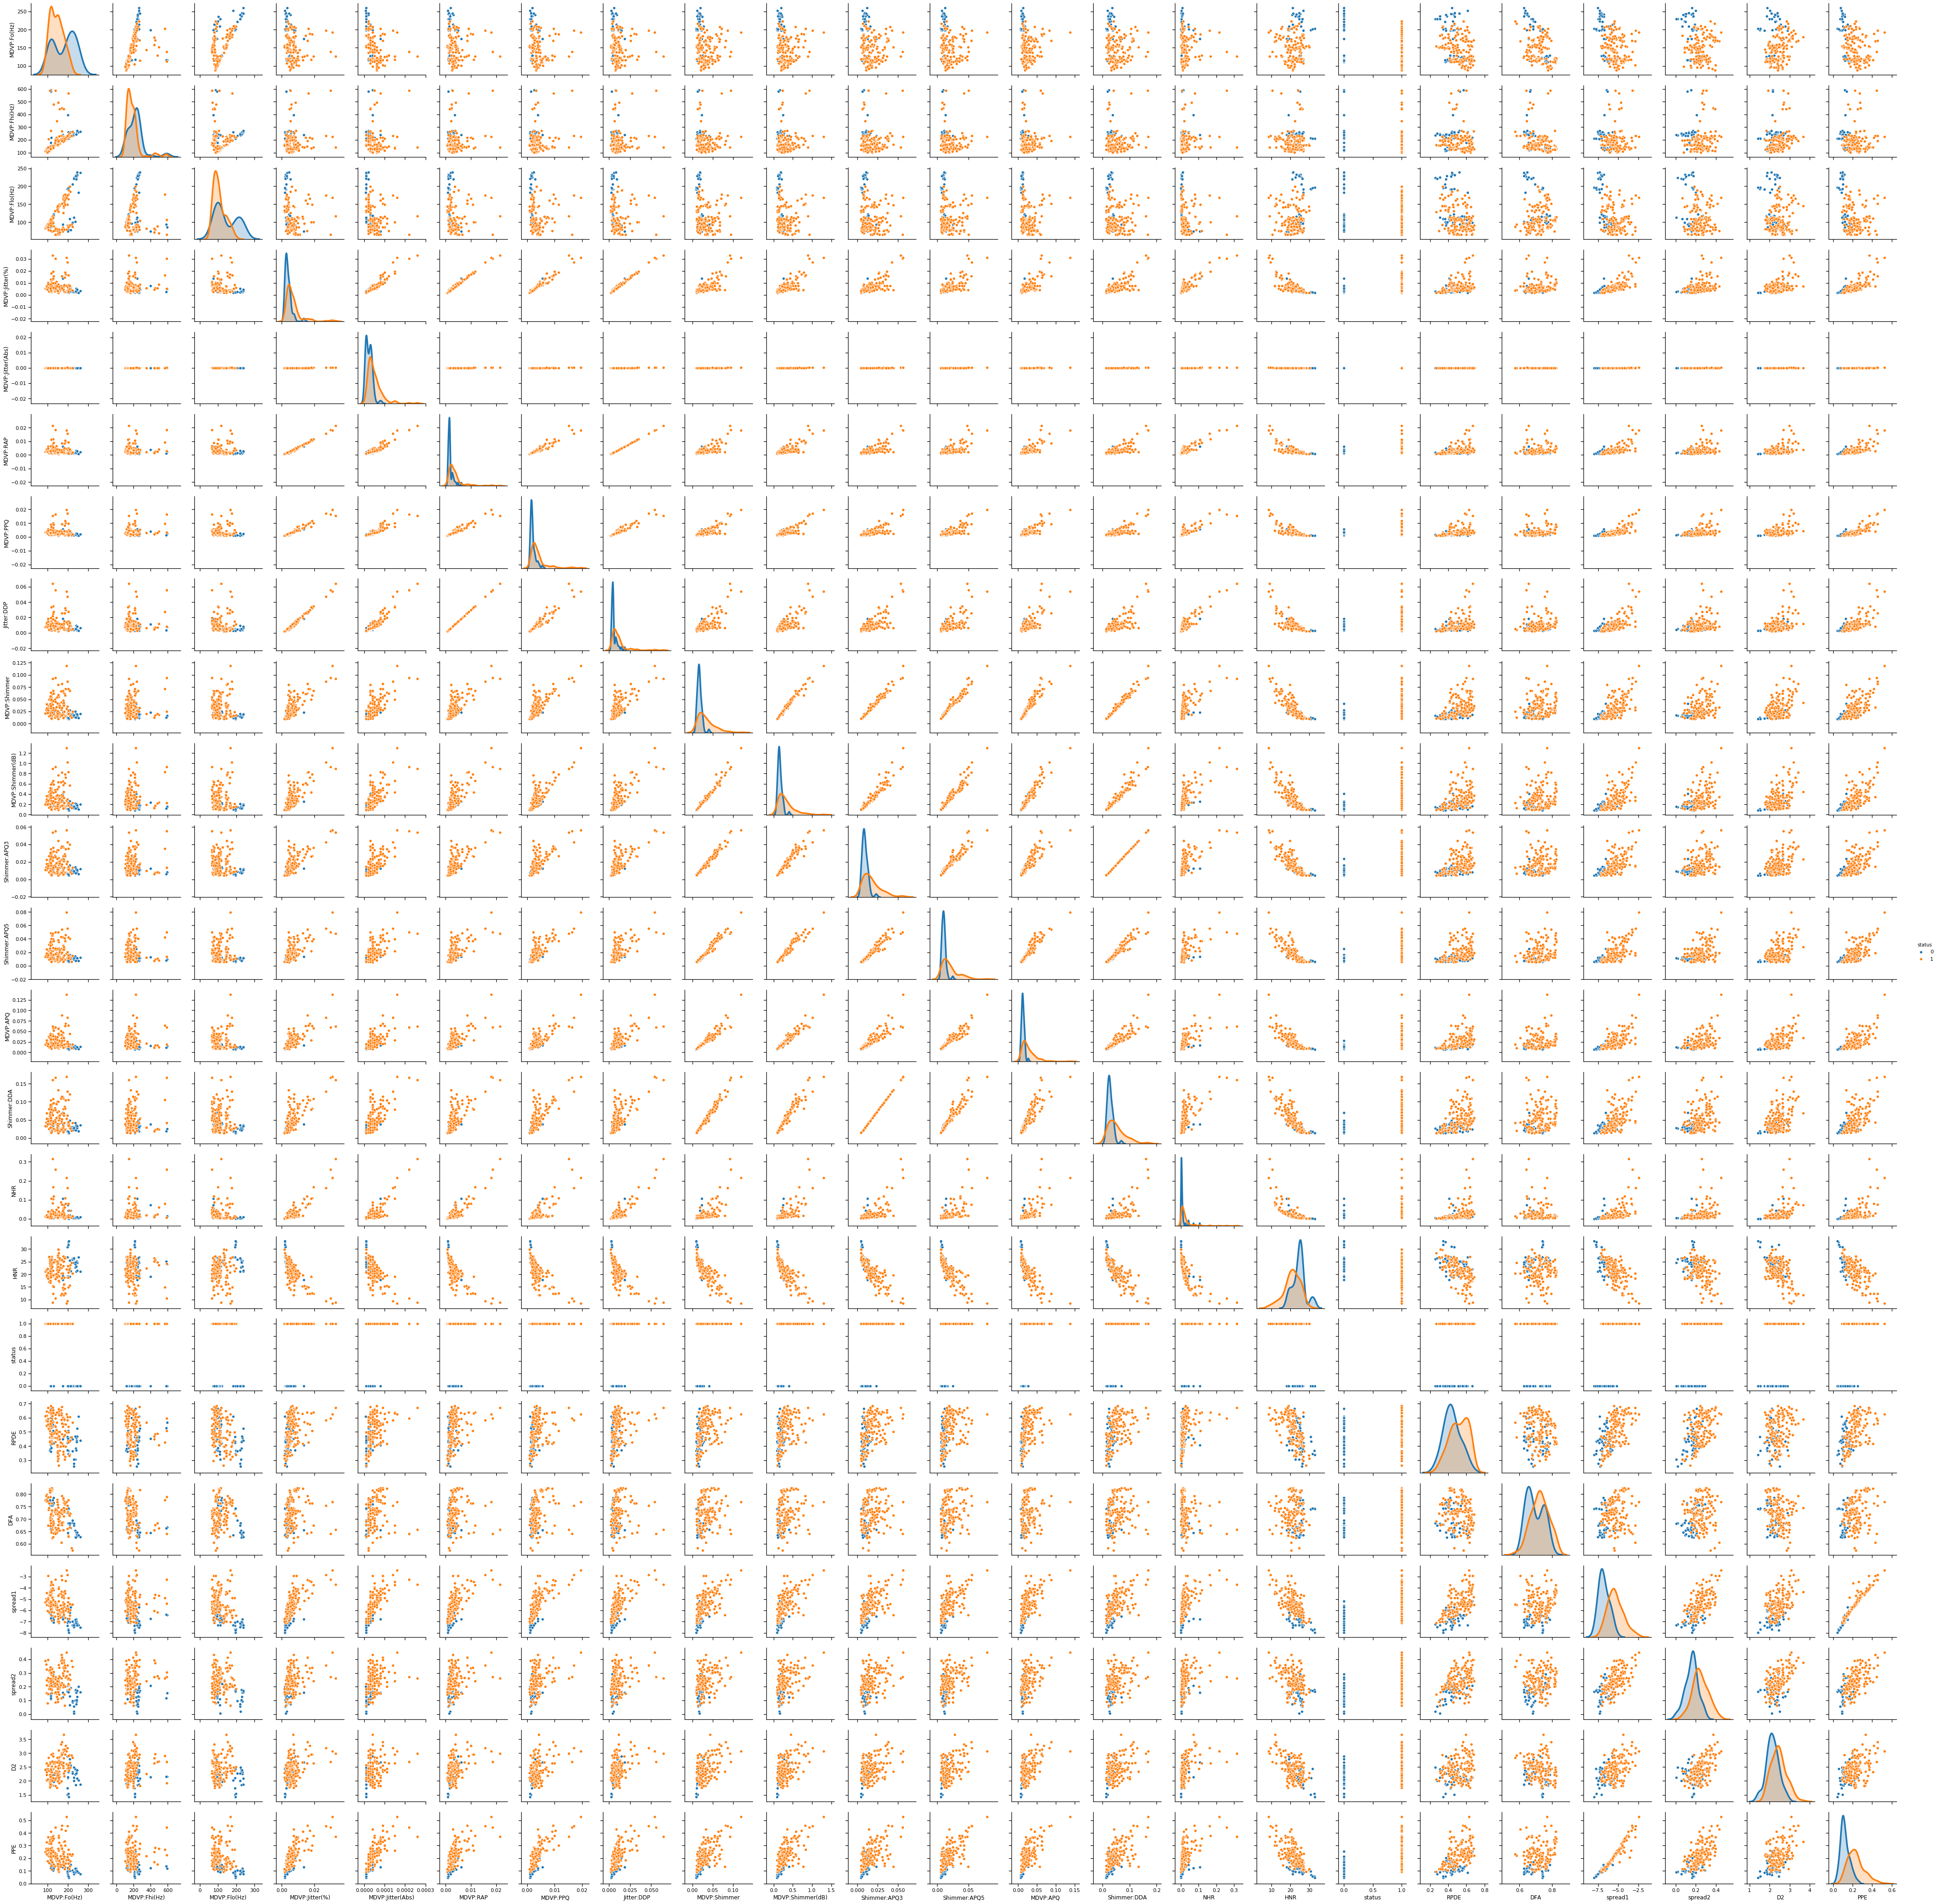

In [20]:
sns.pairplot(df,hue='status')

####  Interpretting the pair plot is difficult as there are so many attributes and 
#### it doesnt differentiate the positive and negative cases parkison disease appropriately

## 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
Splitting the dataset into input and output attributes.....

we are going to drop irrelavant column values from our dataset so that we can get better accuracy...

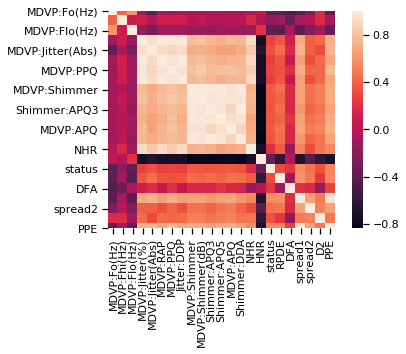

In [20]:
# Heatmap visulisation for each attribute coefficient correlation.
corr_map=df.corr()
sns.heatmap(corr_map,square=True)

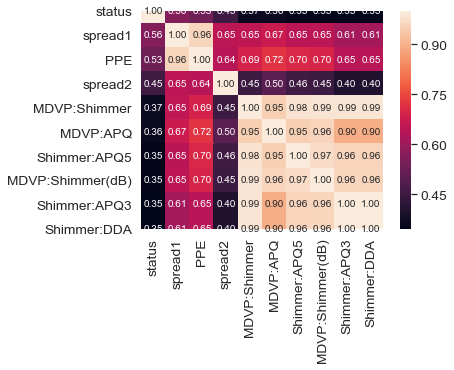

In [21]:
# Now visualise the heat map with correlation coefficient values for pair of attributes.
import matplotlib.pyplot as plt

# K value means how many features required to see in heat map
k=10

# finding the columns which related to output attribute and we are arranging from top coefficient correlation value to downwards.
cols=corr_map.nlargest(k,'status')['status'].index

# correlation coefficient values
coff_values=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(coff_values,cbar=True,annot=True,square=True,fmt='.2f',
           annot_kws={'size': 10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

Well as u saw above heatmap plot it looks like we did. We got coerrelation coefficient values for each pair of values.

But we just visualized top 10 coefficient values.

Now we need to print all the coefficient values in each attribute,later we can decide which attribute have relavant and irrelavant features.

In [22]:
# correlation coefficient values for each attributes in decending order.
correlation_values=df.corr()['status']
correlation_values.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

Above is the correlation values in descending order, we have correaltion values in each attribute so we are going to drop from MDVP:RAP column to MDVP:Fhi(Hz) because it have less correlation with other columns.

If we decrease the column count then accuracy will increase gradually because we are not keeping the irrelevant features.

In [23]:
# Creating seperate DataSets for Target column('statusmed as 'y' and rest of the features in 'X' 
y = df["status"]

In [24]:
# split the dataset into input and output attribute.
cols=['MDVP:RAP','Jitter:DDP','DFA','NHR','MDVP:Fhi(Hz)','name','status']
X=df.drop(cols,axis=1)

In [25]:
test_size = 0.30 # taking 70:30 training and test set
seed = 15  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## 5. Create the model using “entropy” method

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',random_state=seed) #Setting criterion='entropy'
dt.fit(X_train,y_train) # Creating model

DecisionTreeClassifier(criterion='entropy', random_state=15)

## 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
print("What is the Testing Accuracy")
print(dt.score(X_test,y_test))
print("What is the Training Accuracy")
print(dt.score(X_train,y_train))
predicted = dt.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

What is the Testing Accuracy
0.8983050847457628
What is the Training Accuracy
1.0
[[10  4]
 [ 2 43]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.91      0.96      0.93        45

    accuracy                           0.90        59
   macro avg       0.87      0.83      0.85        59
weighted avg       0.90      0.90      0.90        59



- We can see that accuracy in both traing and testing is great.
- Recall for positive class is good as the dataset is baised towards positive class

In [28]:
dt.feature_importances_  # Checking the importance of each feature 

array([0.02496866, 0.13233165, 0.        , 0.03672463, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0887618 ,
       0.        , 0.13150262, 0.05498419, 0.        , 0.        ,
       0.10369977, 0.42702669])

In [29]:
#Count mis-classified one
count_misclassified = (y_test != predicted).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 6


In [30]:
pd.crosstab(predicted,y_test)  # Crosstab between predicted and y_test, this is shown above usisg Confusion Matrix

status,0,1
row_0,,
0,10,2
1,4,43


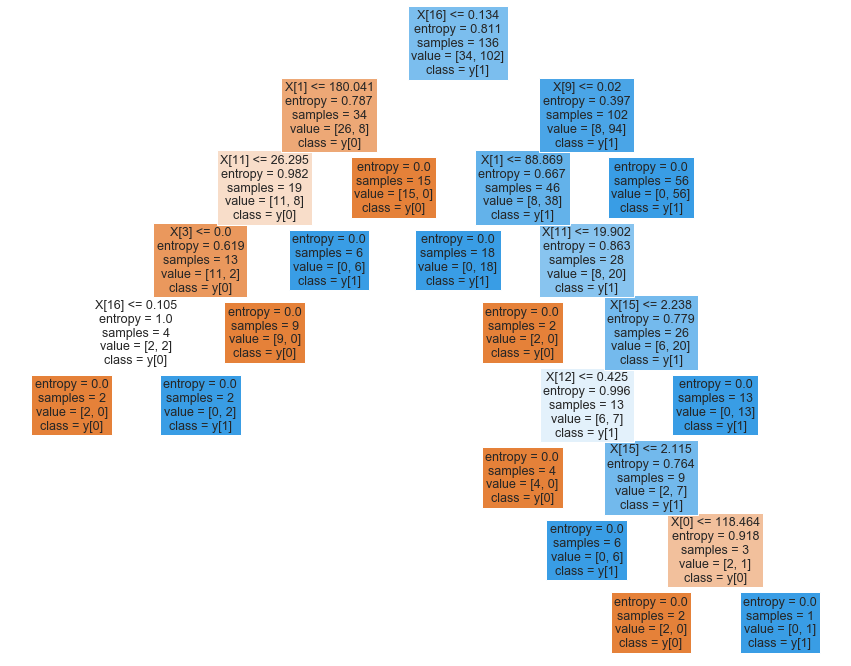

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,12))
plot_tree(dt,filled=True,class_names=True);

## 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 


### The optimal number of max_depth

Automatically created module for IPython interactive environment


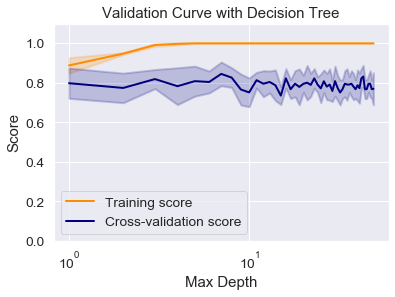

In [32]:
#Plotting Validation Curve
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve

param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X_test, y_test, param_name="max_depth", param_range=param_range,
    scoring="f1", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### Finding optimal value for max_depth

In [33]:

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

myList = list(range(1,100))

cv_scores = []
max_depth = []
for k in myList:
    dtree = DecisionTreeClassifier(criterion='entropy',max_depth=k,random_state=seed)
    scores = cross_val_score(dtree, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    max_depth.append(k)
MSE = [1 - x for x in cv_scores]
max(MSE)
MSE.index(max(MSE))
best_k = myList[MSE.index(max(MSE))]
print ("The optimal number of max_depth is %d" % best_k)

The optimal number of max_depth is 6


### Checking accuracy score with optimal value of max_depth


In [34]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=best_k,random_state=seed) #Setting criterion='entropy'
dt.fit(X_train,y_train) # Creating model
from sklearn.metrics import confusion_matrix,classification_report
print("What is the Testing Accuracy")
print(dt.score(X_test,y_test))
print("What is the Training Accuracy")
print(dt.score(X_train,y_train))
predicted = dt.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

What is the Testing Accuracy
0.9152542372881356
What is the Training Accuracy
0.9852941176470589
[[10  4]
 [ 1 44]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.92      0.98      0.95        45

    accuracy                           0.92        59
   macro avg       0.91      0.85      0.87        59
weighted avg       0.91      0.92      0.91        59



#### We can see that the accuracy of the model has increased 

### The optimal number of min_samples_leaf

Automatically created module for IPython interactive environment


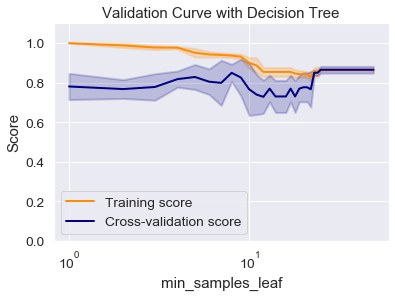

In [35]:
#Plotting Validation Curve
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve

param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X_test, y_test, param_name="min_samples_leaf", param_range=param_range,
    scoring="f1", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree")
plt.xlabel("min_samples_leaf")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### Finding optimal value for min_samples_leaf

In [36]:
myList = list(range(1,10))

cv_scores = []
max_depth = []
for k in myList:
    dtree = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=k,random_state=seed)
    scores = cross_val_score(dtree, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    max_depth.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of min_samples_leaf is %d" % best_k)

The optimal number of min_samples_leaf is 3


### Checking accuracy score with optimal value of min_samples_leaf

In [37]:
dt = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=best_k,random_state=seed) #Setting criterion='entropy'
dt.fit(X_train,y_train) # Creating model
from sklearn.metrics import confusion_matrix,classification_report
print("What is the Testing Accuracy")
print(dt.score(X_test,y_test))
print("What is the Training Accuracy")
print(dt.score(X_train,y_train))
predicted = dt.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

What is the Testing Accuracy
0.8983050847457628
What is the Training Accuracy
0.9705882352941176
[[11  3]
 [ 3 42]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.93      0.93      0.93        45

    accuracy                           0.90        59
   macro avg       0.86      0.86      0.86        59
weighted avg       0.90      0.90      0.90        59



## 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 10,random_state=seed)
rfcl = rfcl.fit(X_train, y_train)
y_pred = rfcl.predict(X_test)
rfcl.score(X_test , y_test)
print("What is the Testing Accuracy")
print(rfcl.score(X_test,y_test))
print("What is the Training Accuracy")
print(rfcl.score(X_train,y_train))
predicted = rfcl.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

What is the Testing Accuracy
0.8983050847457628
What is the Training Accuracy
0.9926470588235294
[[10  4]
 [ 2 43]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.91      0.96      0.93        45

    accuracy                           0.90        59
   macro avg       0.87      0.83      0.85        59
weighted avg       0.90      0.90      0.90        59



In [39]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in Random Forest: {}'.format(count_misclassified))

Misclassified samples in Random Forest: 6


No handles with labels found to put in legend.


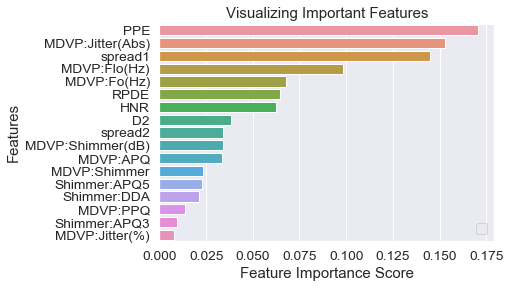

In [40]:
feature_imp = pd.Series(rfcl.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Finding optimal value of n_estimators

#### Method 1

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# creating odd list of K for KNN
myList = list(range(1,100))
# empty list that will hold cv scores
cv_scores = []
n_estimators = []
for k in myList:
    rf = RandomForestClassifier(n_estimators=k,random_state=seed)
    scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    n_estimators.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of n_estimators is %d" % best_k)

The optimal number of n_estimators is 19


#### Method 2

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params_to_test = {
    'n_estimators':list(range(1,100))
}

#here you can put any parameter you want at every run, like random_state or verbosity
rf_model = RandomForestClassifier(random_state=seed)
#here you specify the CV parameters, number of folds, numberof scores to use...
grid_search = GridSearchCV(rf_model, param_grid=params_to_test, cv=10, scoring='f1_macro', n_jobs=4)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_ 
print(best_params)
#best_params is a dict you can pass directly to train a model with optimal settings 
best_model = RandomForestClassifier(n_estimators=best_params['n_estimators'])
best_model.fit(X_train,y_train)

{'n_estimators': 19}


RandomForestClassifier(n_estimators=19)

#### Checking accuracy with optimal value of n_estimators

In [43]:
y_pred = best_model.predict(X_test)
rfcl.score(X_test , y_test)
print("What is the Testing Accuracy")
print(best_model.score(X_test,y_test))
print("What is the Training Accuracy")
print(best_model.score(X_train,y_train))
predicted = best_model.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

What is the Testing Accuracy
0.9322033898305084
What is the Training Accuracy
0.9926470588235294
[[10  4]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.92      1.00      0.96        45

    accuracy                           0.93        59
   macro avg       0.96      0.86      0.90        59
weighted avg       0.94      0.93      0.93        59



With the optimal value for n_estimators for the RandomForestClassifier we can see that the accuracy of the model is max.